In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
!pip install arviz

     |████████████████████████████████| 1.4MB 2.7MB/s 
     |████████████████████████████████| 4.1MB 35.7MB/s 
     |████████████████████████████████| 317kB 50.0MB/s 


In [0]:
%matplotlib inline
import arviz
import numpy as np
import numpy.random as npr
import pymc3 as pm
import matplotlib.pyplot as plt

Especifíquese la semilla para reproducibilidad

In [0]:
npr.seed(0)

In [4]:
q = 0.4
N = 100
yobs = np.random.binomial(N, q, 1)
print('y = ', yobs)

y =  [46]


Especifíquese el modelo Bayesiano:
- La distribución de $\Theta$, $p_\Theta(\theta) = U(\theta \mid 0, 1)$
- La distribución de $Y$ dado $\Theta$, $p_{Y \mid \Theta}(y \mid \theta) = \mathrm{Binomial}(y \mid \theta)$

In [0]:
model = pm.Model()
with model:
    q = pm.Uniform('q', lower=0, upper=1)
    y = pm.Binomial('y', N, q, observed=yobs)

Genérense las muestras de la distribución condicional $p_{\Theta \mid Y}(\theta \mid y)$

In [6]:
with model:
    trace = pm.sample(5000, random_seed=0)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [q]
100%|██████████| 5500/5500 [00:03<00:00, 1592.84it/s]
The acceptance probability does not match the target. It is 0.8807178466061448, but should be close to 0.8. Try to increase the number of tuning steps.


(0, 1)

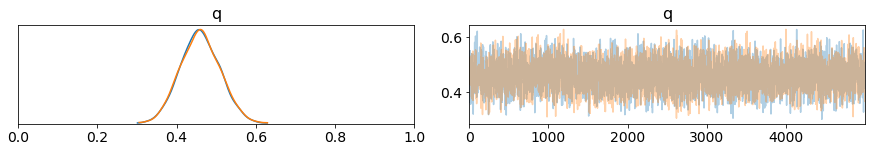

In [7]:
axes = pm.traceplot(trace);
axes[0][0].set_xlim(0, 1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f168bde10>],
      dtype=object)

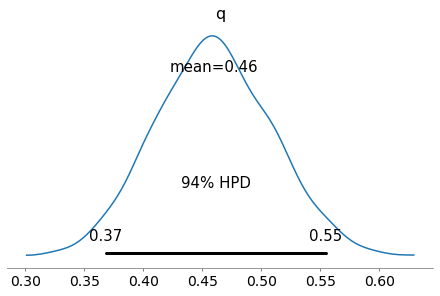

In [8]:
pm.plot_posterior(trace)

(0, 1)

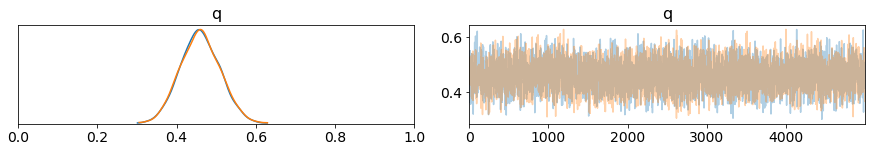

In [9]:
axes = pm.traceplot(trace);
axes[0][0].set_xlim(0, 1)

Más detalles de la distribución condicional:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f1e263c18>],
      dtype=object)

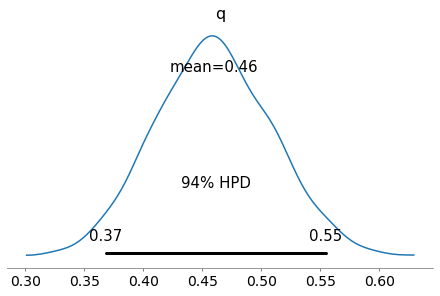

In [10]:
pm.plot_posterior(trace)